# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [182]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [183]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
pd.set_option('display.max_columns', None)
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,CODMUNRES,GESTACAO,GRAVIDEZ,PARTO,CONSULTAS,DTNASC,HORANASC,SEXO,APGAR1,APGAR5,RACACOR,PESO,IDANOMAL,DTCADASTRO,CODANOMAL,NUMEROLOTE,VERSAOSIST,DTRECEBIM,DIFDATA,DTRECORIGA,NATURALMAE,CODMUNNATU,CODUFNATU,ESCMAE2010,SERIESCMAE,DTNASCMAE,RACACORMAE,QTDGESTANT,QTDPARTNOR,QTDPARTCES,IDADEPAI,DTULTMENST,SEMAGESTAC,TPMETESTIM,CONSPRENAT,MESPRENAT,TPAPRESENT,STTRABPART,STCESPARTO,TPNASCASSI,TPFUNCRESP,TPDOCRESP,DTDECLARAC,ESCMAEAGR1,STDNEPIDEM,STDNNOVA,CODPAISRES,TPROBSON,PARIDADE,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,110001,37 a 41 semanas,Única,Cesáreo,4,2019-02-19,1620.0,Masculino,9.0,10.0,Branca,3685,2.0,2019-03-08,NaN,20190004,3.2.01,2019-03-08,17,NaN,811.0,110001.0,11.0,3.0,NaN,20121999.0,1.0,0.0,0.0,0.0,26.0,15052018.0,39.0,8.0,8.0,1.0,1.0,2.0,2.0,1.0,2.0,3.0,19022019.0,12.0,0,1,1,1,0,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,110001,37 a 41 semanas,Única,Cesáreo,4,2019-02-21,1830.0,Feminino,8.0,9.0,Branca,3055,2.0,2019-03-08,NaN,20190004,3.2.01,2019-03-08,15,NaN,811.0,110015.0,11.0,3.0,NaN,27041989.0,1.0,1.0,0.0,1.0,24.0,27052018.0,38.0,8.0,10.0,2.0,1.0,2.0,2.0,1.0,5.0,4.0,21022019.0,12.0,0,1,1,5,1,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,110001,37 a 41 semanas,Única,Cesáreo,4,2019-02-25,915.0,Feminino,8.0,10.0,Branca,3460,2.0,2019-03-08,NaN,20190004,3.2.01,2019-03-08,11,NaN,841.0,410045.0,41.0,3.0,NaN,6031981.0,1.0,2.0,1.0,1.0,32.0,18052018.0,40.0,8.0,8.0,1.0,2.0,2.0,2.0,1.0,2.0,4.0,25022019.0,12.0,0,1,1,7,1,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,110037,37 a 41 semanas,Única,Cesáreo,3,2019-03-20,835.0,Feminino,9.0,10.0,Parda,2982,2.0,2019-04-03,NaN,20190005,3.2.01,2019-04-09,20,NaN,841.0,410480.0,41.0,5.0,NaN,15071988.0,4.0,0.0,0.0,0.0,24.0,25062018.0,38.0,8.0,6.0,2.0,1.0,2.0,1.0,1.0,2.0,3.0,20032019.0,8.0,0,1,1,2,0,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,110001,37 a 41 semanas,Única,Cesáreo,4,2019-03-23,750.0,Feminino,8.0,10.0,Parda,3310,2.0,2019-04-03,NaN,20190005,3.2.01,2019-04-09,17,NaN,811.0,110001.0,11.0,3.0,NaN,12111988.0,4.0,1.0,0.0,1.0,27.0,27062018.0,38.0,8.0,8.0,2.0,1.0,2.0,1.0,1.0,2.0,3.0,23032019.0,12.0,0,1,1,5,1,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


# Tarefa 1

### 1. Idade media das mães e dos pais por município (coluna munResNome)


                            IDADEMAE   IDADEPAI
munResNome                                     
Alta Floresta D'Oeste      25.991826  29.548701
Alto Alegre dos Parecis    24.844156  29.179104
Alto Paraíso               24.960177  28.833333
Alvorada D'Oeste           25.770732  30.757282
Ariquemes                  25.607866  32.466667
Buritis                    25.559177  30.812500
Cabixi                     26.037500  34.333333
Cacaulândia                25.546667  36.333333
Cacoal                     26.890102  30.931854
Campo Novo de Rondônia     24.825301  30.500000
Candeias do Jamari         25.243323  29.894737
Castanheiras               27.281250  30.392857
Cerejeiras                 27.240506  31.652778
Chupinguaia                25.333333  29.629630
Colorado do Oeste          27.602804  34.354839
Corumbiara                 24.716535  32.470588
Costa Marques              24.412017  30.613636
Cujubim                    24.482927  31.400000
Espigão D'Oeste            26.093333  31

Text(0, 0.5, 'Idade Média')

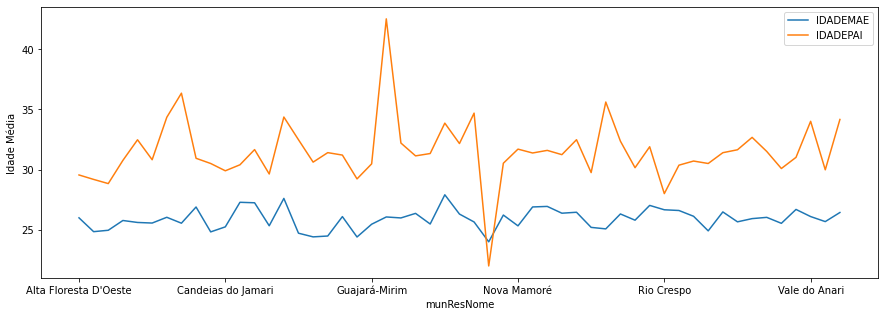

In [184]:
sinasc_1 = sinasc_raw[['munResNome','IDADEMAE','IDADEPAI']]
media_idade = sinasc_1.groupby('munResNome').mean()
print(media_idade)
media_idade.plot(figsize=[15,5])
plt.ylabel('Idade Média')

### 2. Peso médio dos bebes por sexo que nasceram no dia do seu aniversário por faixas de escolaridade mae
Ex: Você, aluna(o), nasceu no dia 10/01, então você precisa filtrar o conjunto de dados nessa data e calcular o peso médio dos bebês de cada sexo por faixa de escolaridade da mãe.

In [185]:
def filtro(df,data_nasc):
    df_1 = df[df['DTNASC']== data_nasc]
    df_1 = df_1[['ESCMAE','SEXO','PESO']] 
    return df_1
sinasc_new = filtro(sinasc_raw,'2019-09-07')
print(sinasc_new.groupby(['ESCMAE','SEXO'])['PESO'].mean().unstack())
#print(sinasc_new.groupby(['ESCMAE','SEXO'])['PESO'].mean().unstack().plot(figsize=[15,5]))



SEXO                Feminino    Masculino
ESCMAE                                   
1 a 3 anos               NaN  2907.500000
12 anos ou mais  3405.000000  3253.333333
4 a 7 anos       3213.125000  3082.142857
8 a 11 anos      3114.555556  3121.230769


### 3. Qual o municipio que nasceu menos bebe em 2019?
    - qual a idade media, maxima, minima das maes nesse municipio?
    - qual a idade media, maxima, minima dos pais nesse municipio?

In [186]:
mun_menos_nasc = sinasc_1.groupby('munResNome')['IDADEMAE'].count().sort_values()
print(mun_menos_nasc[0:3][0:])
print('\n')
print('Município com menor número de nascimento é Castanheiras,')
print('pois excluímos o primeiros item da lista por ter Município Ignorado')
print('\n')
sinasc_cast = sinasc_1[sinasc_1['munResNome']=='Castanheiras'].groupby('munResNome').agg([('Média','mean'),('Máximo','max'),('Mínimo','min')])
print(sinasc_cast)

munResNome
Município ignorado - RO     1
Castanheiras               32
Pimenteiras do Oeste       40
Name: IDADEMAE, dtype: int64


Município com menor número de nascimento é Castanheiras,
pois excluímos o primeiros item da lista por ter Município Ignorado


              IDADEMAE                 IDADEPAI              
                 Média Máximo Mínimo      Média Máximo Mínimo
munResNome                                                   
Castanheiras  27.28125     39     17  30.392857   43.0   17.0


### 4. Qual o municipio que nasceu mais bebe no mês de março?
    - qual a quantidade de filhos vivos media, maxima, minima nesse municipio?
    - qual a idade media, maxima, minima dos pais nesse municipio?



### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados. Algo que você julgue relevante e novo pra você.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios x é maior que y.

In [187]:
sinasc_2 = sinasc_raw[['munResNome','IDADEMAE','IDADEPAI','QTDFILVIVO']]
mun_mais_nasc = sinasc_2.groupby('munResNome')['IDADEMAE'].count().sort_values(ascending=False)
print(mun_mais_nasc[0:3][0:])
print('\n')
print('Município com maior número de nascimento é Porto Velho')
print('\n')

filho_vivo_pv = sinasc_2[sinasc_2['munResNome']=='Porto Velho'].groupby('munResNome').agg({'QTDFILVIVO':[('Média','mean'),('Máximo','max'),('Mínimo','min')]})
print(filho_vivo_pv)
print('\n')

sinasc_pv = sinasc_2[sinasc_2['munResNome']=='Porto Velho'].groupby('munResNome').agg({'IDADEMAE':[('Média','mean'),('Máximo','max'),('Mínimo','min')],'IDADEPAI':[('Média','mean'),('Máximo','max'),('Mínimo','min')]})
print(sinasc_pv)




munResNome
Porto Velho    8437
Ji-Paraná      2182
Ariquemes      1729
Name: IDADEMAE, dtype: int64


Município com maior número de nascimento é Porto Velho


            QTDFILVIVO              
                 Média Máximo Mínimo
munResNome                          
Porto Velho   1.167236   12.0    0.0


             IDADEMAE                 IDADEPAI              
                Média Máximo Mínimo      Média Máximo Mínimo
munResNome                                                  
Porto Velho  26.31267     47     12  32.352679   65.0   16.0


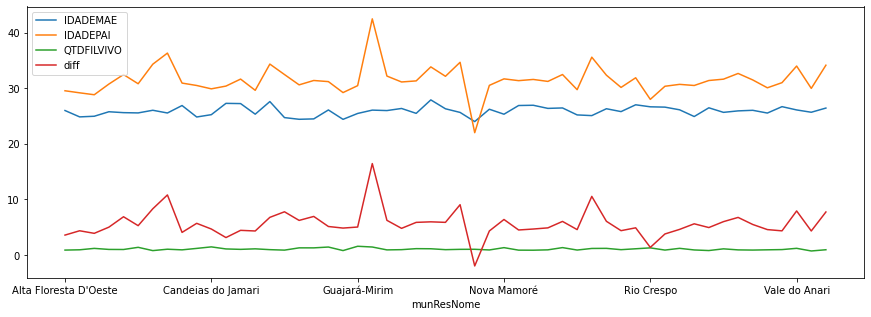

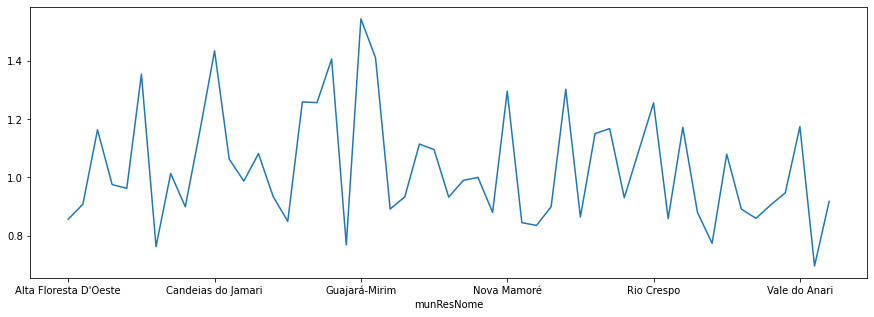

                            IDADEMAE   IDADEPAI  QTDFILVIVO       diff
munResNome                                                            
Alta Floresta D'Oeste      25.991826  29.548701    0.856354   3.556876
Alto Alegre dos Parecis    24.844156  29.179104    0.907895   4.334949
Alto Paraíso               24.960177  28.833333    1.162896   3.873156
Alvorada D'Oeste           25.770732  30.757282    0.975248   4.986550
Ariquemes                  25.607866  32.466667    0.962253   6.858801
Buritis                    25.559177  30.812500    1.353846   5.253323
Cabixi                     26.037500  34.333333    0.762500   8.295833
Cacaulândia                25.546667  36.333333    1.013333  10.786667
Cacoal                     26.890102  30.931854    0.899123   4.041752
Campo Novo de Rondônia     24.825301  30.500000    1.160305   5.674699
Candeias do Jamari         25.243323  29.894737    1.433775   4.651413
Castanheiras               27.281250  30.392857    1.062500   3.111607
Cereje

In [180]:
sinasc_3 = sinasc_raw[['munResNome','IDADEMAE','IDADEPAI','QTDFILVIVO']]
estat = sinasc_3.groupby('munResNome').mean()
estat['diff']=estat['IDADEPAI']-estat['IDADEMAE']
estat.plot(figsize=[15,5])
plt.show()
estat['QTDFILVIVO'].plot(figsize=[15,5])
plt.show()
estat['diff']=estat['IDADEPAI']-estat['IDADEMAE']
print(estat)



In [ ]:
Podemos observar que em Itapuã do Oeste é o município onde temos a maior diferença entre a média de idade o Pai e da Mãe, também temos a terceira maior médias de filhos entre os municípios.

In [6]:
sinasc_raw.dtypes

ORIGEM          int64
CODESTAB      float64
CODMUNNASC      int64
LOCNASC         int64
IDADEMAE        int64
               ...   
munResUf       object
munResLat     float64
munResLon     float64
munResAlt     float64
munResArea    float64
Length: 69, dtype: object

In [7]:
sinasc_raw.select_dtypes(exclude=['int64','float64'])

,ESCMAE,GESTACAO,GRAVIDEZ,PARTO,DTNASC,SEXO,RACACOR,DTCADASTRO,CODANOMAL,VERSAOSIST,DTRECEBIM,munResStatus,munResTipo,munResNome,munResUf
0,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-02-19,Masculino,Branca,2019-03-08,NaN,3.2.01,2019-03-08,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
1,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-02-21,Feminino,Branca,2019-03-08,NaN,3.2.01,2019-03-08,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
2,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-02-25,Feminino,Branca,2019-03-08,NaN,3.2.01,2019-03-08,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
3,12 anos ou mais,37 a 41 semanas,Única,Cesáreo,2019-03-20,Feminino,Parda,2019-04-03,NaN,3.2.01,2019-04-09,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia
4,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-03-23,Feminino,Parda,2019-04-03,NaN,3.2.01,2019-04-09,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27023,12 anos ou mais,32 a 36 semanas,Única,Cesáreo,2019-12-13,Masculino,Branca,2020-09-28,NaN,3.2.01,2020-10-13,ATIVO,MUNIC,Vilhena,Rondônia
27024,8 a 11 anos,37 a 41 semanas,Única,Vaginal,2019-10-04,Masculino,Branca,2019-10-16,NaN,3.2.01,2019-10-21,ATIVO,MUNIC,Chupinguaia,Rondônia
27025,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-08-02,Masculino,Parda,2019-08-07,NaN,3.2.00,2019-08-07,ATIVO,MUNIC,Vilhena,Rondônia
27026,8 a 11 anos,32 a 36 semanas,Única,Vaginal,2019-12-23,Masculino,Parda,2020-01-07,NaN,3.2.00,2020-01-07,ATIVO,MUNIC,Vilhena,Rondônia


In [4]:
sinasc_raw.columns

Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'ESCMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES',
       'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC',
       'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO',
       'CODANOMAL', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA',
       'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010',
       'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR',
       'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC', 'TPMETESTIM',
       'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO',
       'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1',
       'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE',
       'KOTELCHUCK', 'CONTADOR', 'munResStatus', 'munResTipo', 'munResNome',
       'munResUf', 'munResLat', 'munResLon', 'munResAlt', 'munResArea'],
      dtype='object')